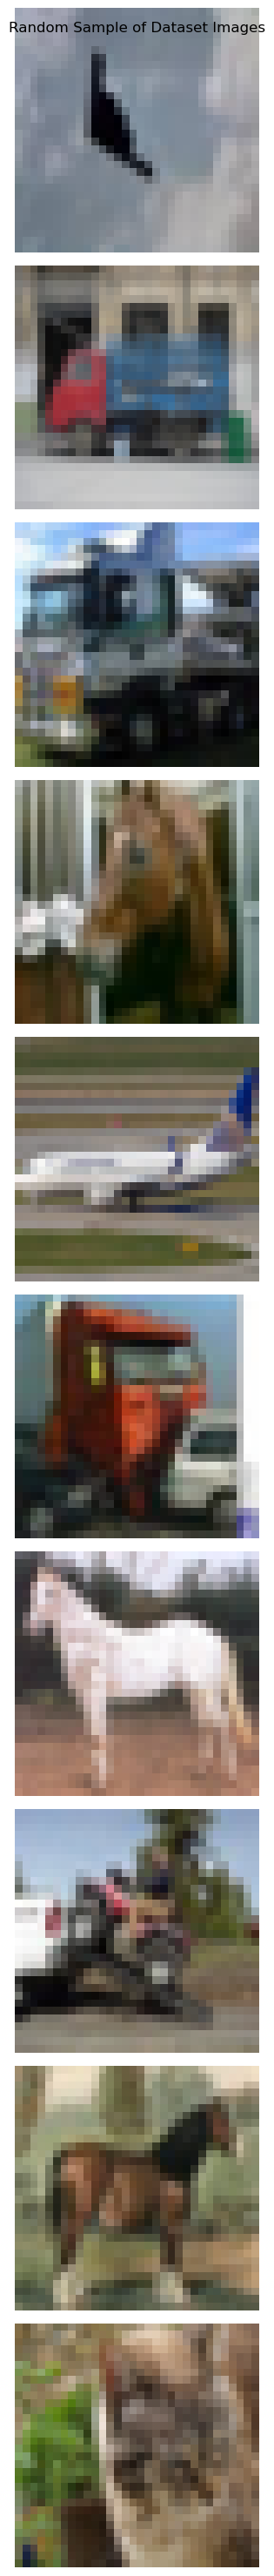

In [1]:
import pickle
import numpy as np
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
dataset = pickle.load(open("/home/cerendnr/Downloads/HW_2_data/datasets/part3_dataset.data", "rb"))

def visualize_images_row_by_row(data, num_images=10, img_size=(32, 32, 3)):
    """
    Visualize a few images from the dataset, displaying each on a separate row.

    Parameters:
    - data: Flattened image data (rows = samples, columns = flattened pixels).
    - num_images: Number of images to visualize.
    - img_size: Tuple indicating the shape of each image (e.g., (32, 32, 3)).
    """
    # Select random images from the dataset
    random_indices = np.random.choice(data.shape[0], num_images, replace=False)
    selected_images = data[random_indices]
    
    # Visualize the images
    plt.figure(figsize=(5, num_images * 3))
    for i, img in enumerate(selected_images):
        plt.subplot(num_images, 1, i + 1)
        plt.imshow(img.reshape(img_size))  # Reshape flattened images into original size
        plt.axis('off')
    plt.suptitle("Random Sample of Dataset Images")
    plt.tight_layout()
    plt.show()

# Visualize images in rows (assuming 32x32x3 RGB format)
visualize_images_row_by_row(dataset, num_images=10, img_size=(32, 32, 3))


In [2]:
dbscan = DBSCAN(eps=0.18, min_samples=2, metric='cosine')
labels = dbscan.fit_predict(dataset)

# Analyze DBSCAN results
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points.")


DBSCAN found 3 clusters and 24 noise points.


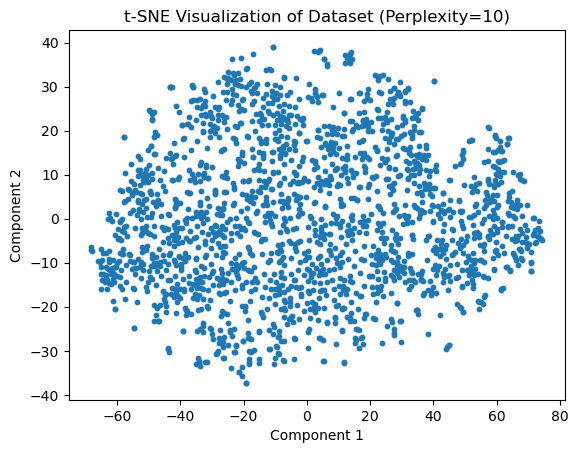

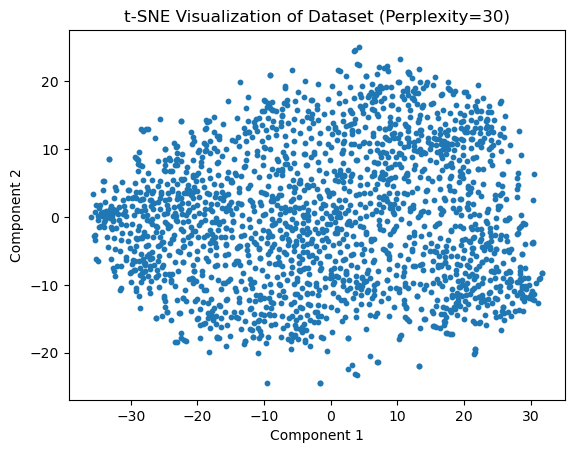

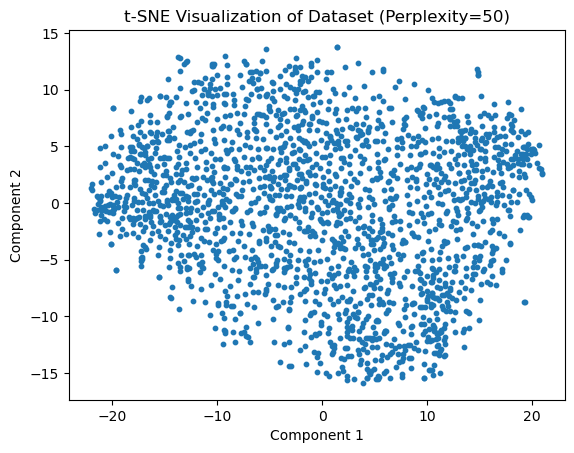

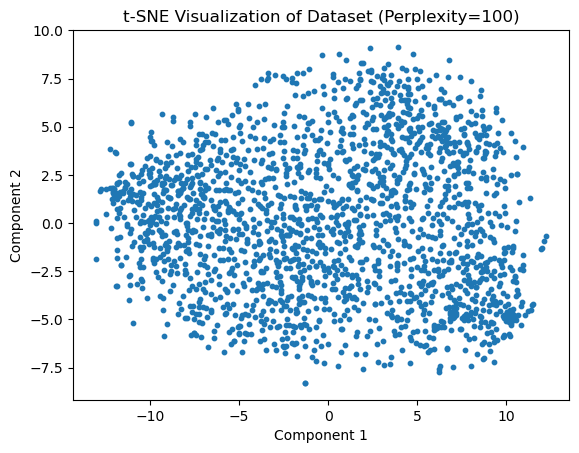

In [5]:
from sklearn.manifold import TSNE

# Performing tsne with perplexity 10, 30, 50, 100 in the for loop
for perplexity in [10, 30, 50, 100]:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    reduced_data = tsne.fit_transform(dataset)

    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=10)
    plt.title(f"t-SNE Visualization of Dataset (Perplexity={perplexity})")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()



In [6]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import DBSCAN

# Load the dataset
dataset = pickle.load(open("/home/cerendnr/Downloads/HW_2_data/datasets/part3_dataset.data", "rb"))

# Perform DBSCAN clustering with best parameters
def perform_dbscan(data, eps=0.3, min_samples=5, metric='cosine'):
    print(f"Performing DBSCAN with eps={eps}, min_samples={min_samples}, metric={metric}...")
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = dbscan.fit_predict(data)
    print(f"Number of clusters (excluding noise): {len(set(labels)) - (1 if -1 in labels else 0)}")
    return labels

# Function to visualize data in 2D
def plot_2d(data, labels, title):
    plt.figure(figsize=(10, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        if label == -1:  # For DBSCAN noise points
            plt.scatter(data[labels == label, 0], data[labels == label, 1], s=10, label="Noise", alpha=0.5)
        else:
            plt.scatter(data[labels == label, 0], data[labels == label, 1], s=30, label=f"Cluster {label}")
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.show()

# PCA for noise reduction
def preprocess_with_pca(data, n_components=50):
    print(f"Preprocessing with PCA (Reducing to {n_components} dimensions)...")
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(data)
    return reduced_data

# Perform t-SNE for dimensionality reduction
def perform_tsne(data, perplexity=30, learning_rate=200):
    print(f"Performing t-SNE with Perplexity={perplexity}, Learning Rate={learning_rate}...")
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, random_state=42)
    reduced_data = tsne.fit_transform(data)
    print("t-SNE completed.")
    return reduced_data



/home/cerendnr/miniforge3/envs/roboenv2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Performing t-SNE with Perplexity=30, Learning Rate=200...
t-SNE completed.


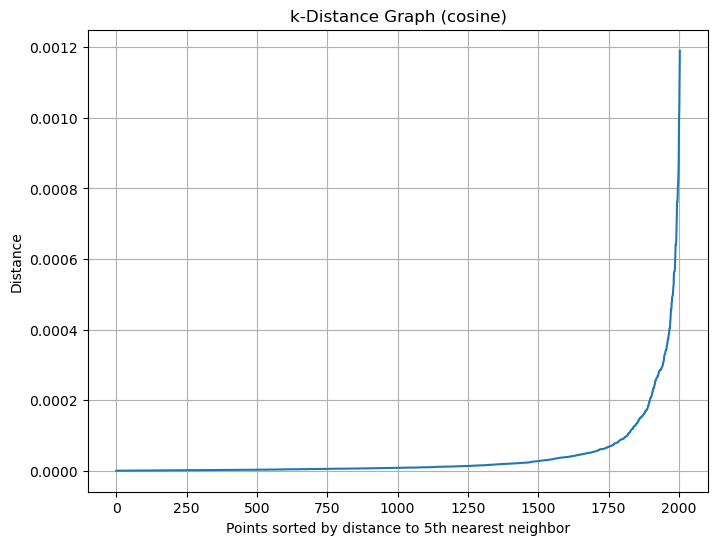

Performing DBSCAN with eps=0.0007, min_samples=2, metric=cosine...
Number of clusters (excluding noise): 5


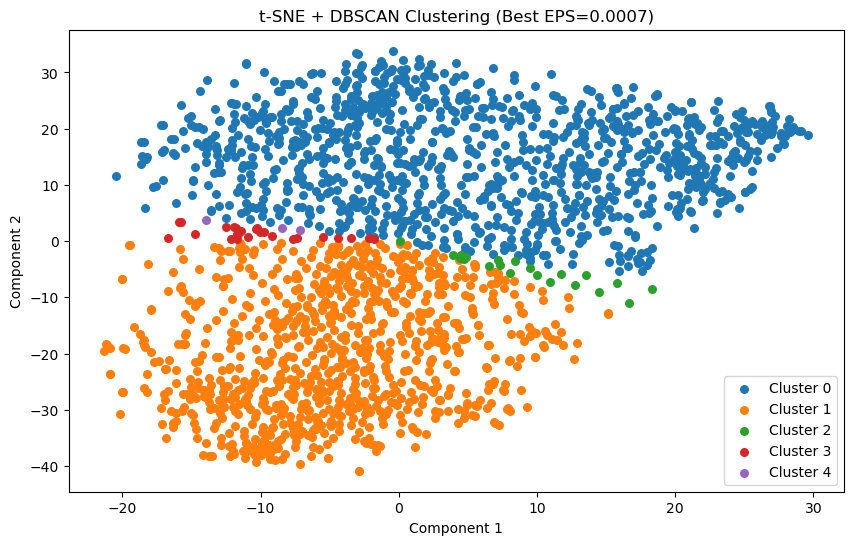

In [7]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

def find_k_distance_graph(data, n_neighbors=5, metric='cosine'):
    """
    Generate and plot the k-distance graph to find the optimal epsilon for DBSCAN.
    
    Parameters:
    - data: Dataset (e.g., t-SNE reduced data).
    - n_neighbors: Number of neighbors to calculate k-distance (should match `min_samples` in DBSCAN).
    - metric: Distance metric to use (e.g., 'cosine' or 'euclidean').
    
    Returns:
    - distances: Sorted k-distances.
    """
    # Fit NearestNeighbors
    neighbors = NearestNeighbors(n_neighbors=n_neighbors, metric=metric)
    neighbors.fit(data)
    distances, _ = neighbors.kneighbors(data)

    # Sort the k-th nearest neighbor distances
    distances = np.sort(distances[:, n_neighbors - 1])

    # Plot the k-distance graph
    plt.figure(figsize=(8, 6))
    plt.plot(distances)
    plt.title(f"k-Distance Graph ({metric})")
    plt.xlabel(f"Points sorted by distance to {n_neighbors}th nearest neighbor")
    plt.ylabel("Distance")
    plt.grid()
    plt.show()

    return distances

# Main execution
if __name__ == "__main__":
    # Step 1: Perform t-SNE for dimensionality reduction
    tsne_data = perform_tsne(dataset, perplexity=30, learning_rate=200)

    # Step 2: Generate k-distance graph
    k_distances = find_k_distance_graph(tsne_data, n_neighbors=5, metric='cosine')

    # Step 3: Choose the best epsilon based on the elbow point in the graph
    best_eps = 0.0007  # Set based on the visual elbow point in the graph

    # Step 4: Apply DBSCAN with the chosen epsilon
    labels = perform_dbscan(tsne_data, eps=best_eps, min_samples=2, metric='cosine')

    # Step 5: Visualize the clustering result
    plot_2d(tsne_data, labels, f"t-SNE + DBSCAN Clustering (Best EPS={best_eps})")


Performing t-SNE with Perplexity=30, Learning Rate=200...
t-SNE completed.


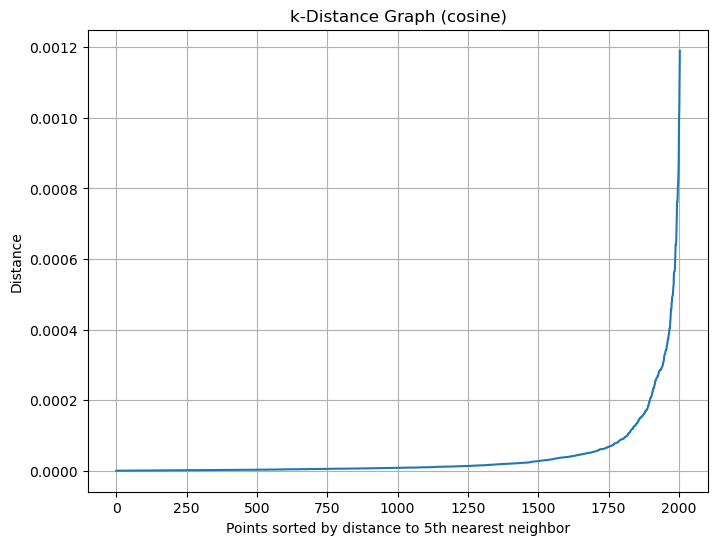

Performing DBSCAN with eps=0.0008, min_samples=5, metric=cosine...
Silhouette Score: 0.3004
DBSCAN found 5 clusters and 3 noise points.


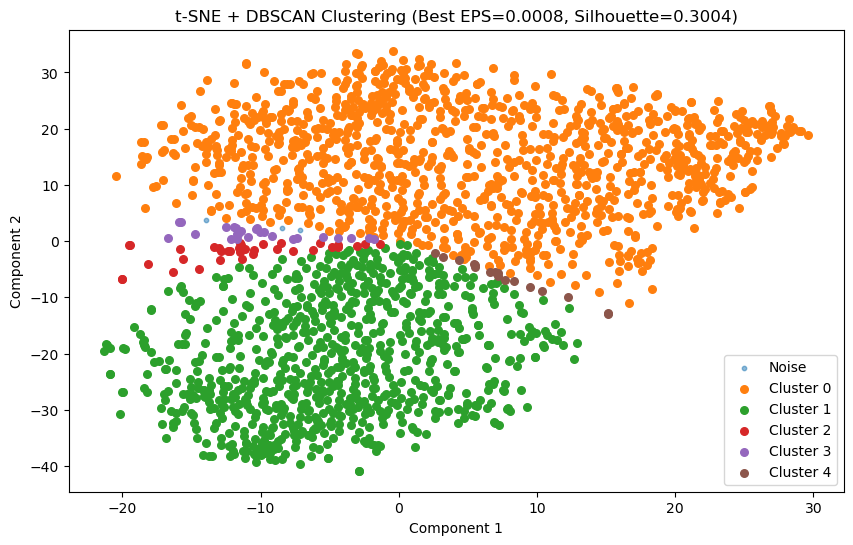

Performing DBSCAN with eps=0.0005, min_samples=5, metric=cosine...
Silhouette Score: 0.2317
DBSCAN found 11 clusters and 7 noise points.


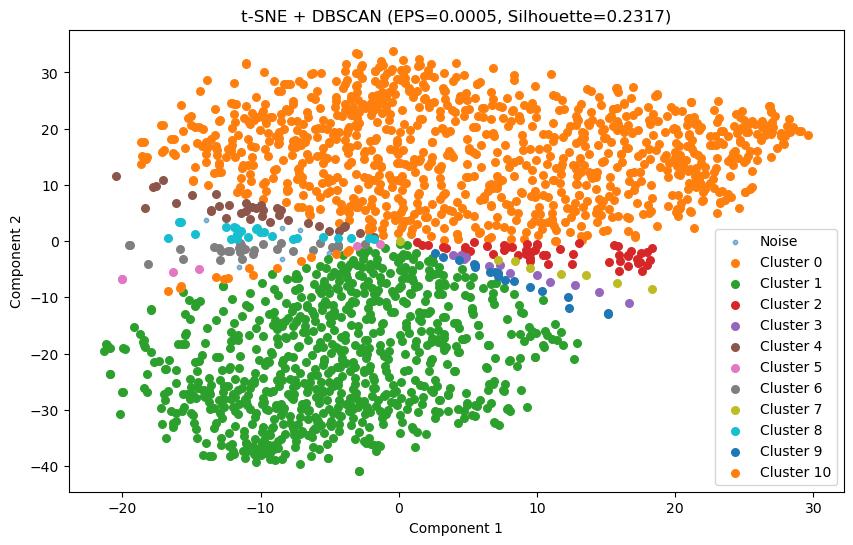

Performing DBSCAN with eps=0.0006, min_samples=5, metric=cosine...
Silhouette Score: 0.2827
DBSCAN found 8 clusters and 7 noise points.


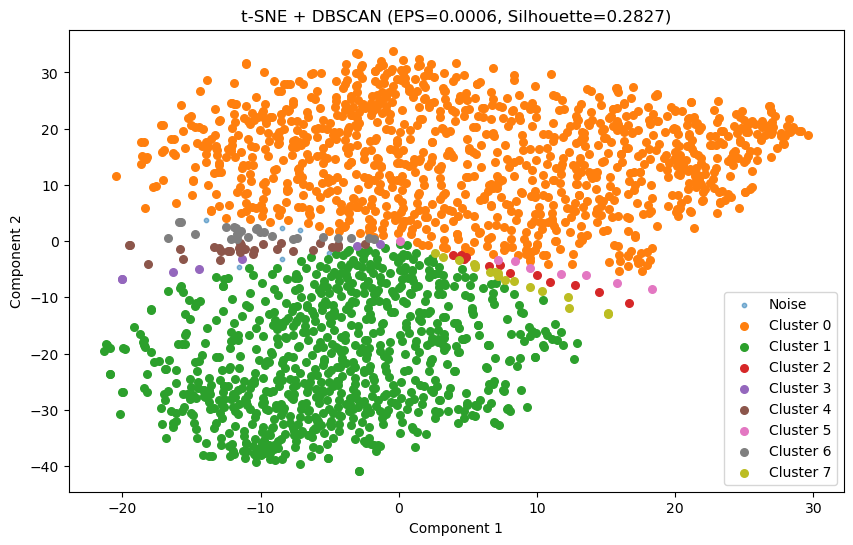

Performing DBSCAN with eps=0.0007, min_samples=5, metric=cosine...
Silhouette Score: 0.2965
DBSCAN found 7 clusters and 4 noise points.


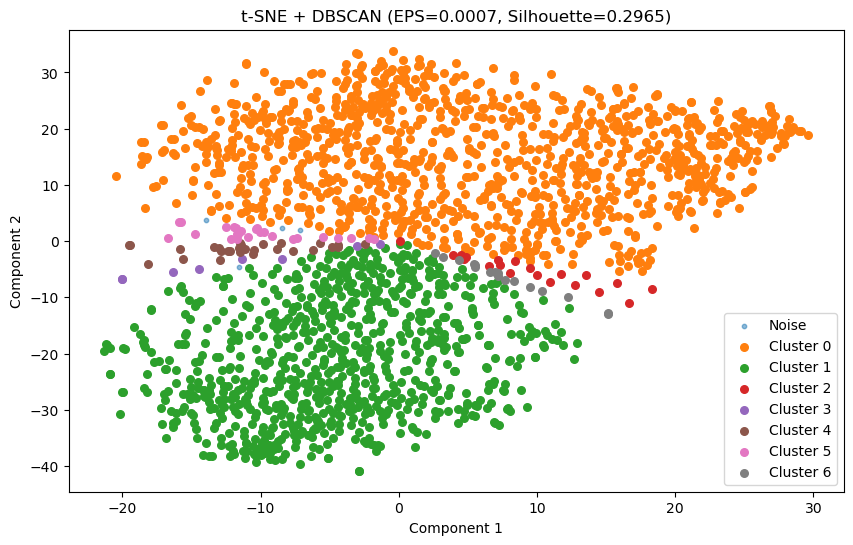

Performing DBSCAN with eps=0.0008, min_samples=5, metric=cosine...
Silhouette Score: 0.3004
DBSCAN found 5 clusters and 3 noise points.


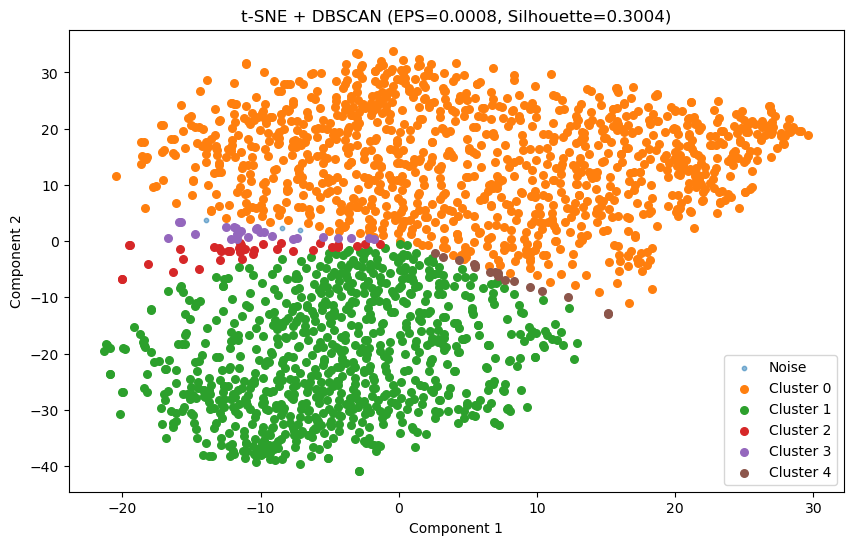

Performing DBSCAN with eps=0.0009, min_samples=5, metric=cosine...
Silhouette Score: 0.4933
DBSCAN found 3 clusters and 1 noise points.


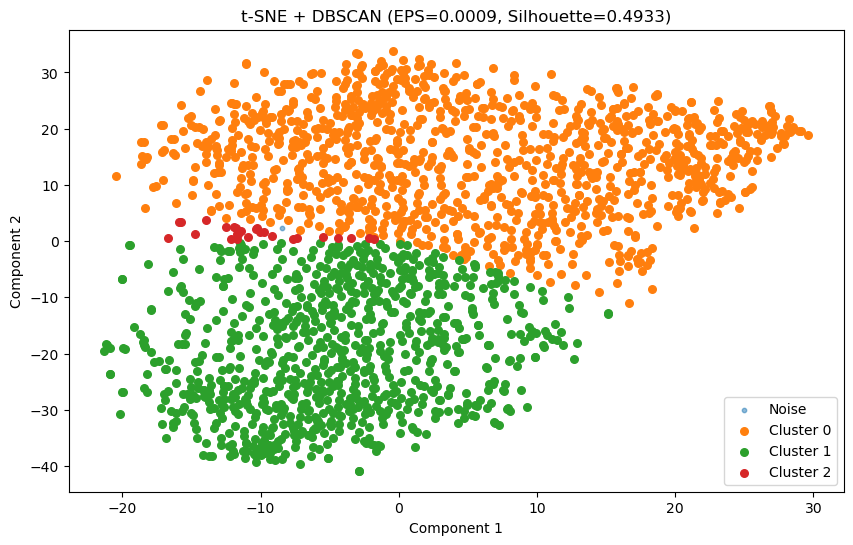

Performing DBSCAN with eps=0.001, min_samples=5, metric=cosine...
Silhouette Score: 0.5341
DBSCAN found 3 clusters and 0 noise points.


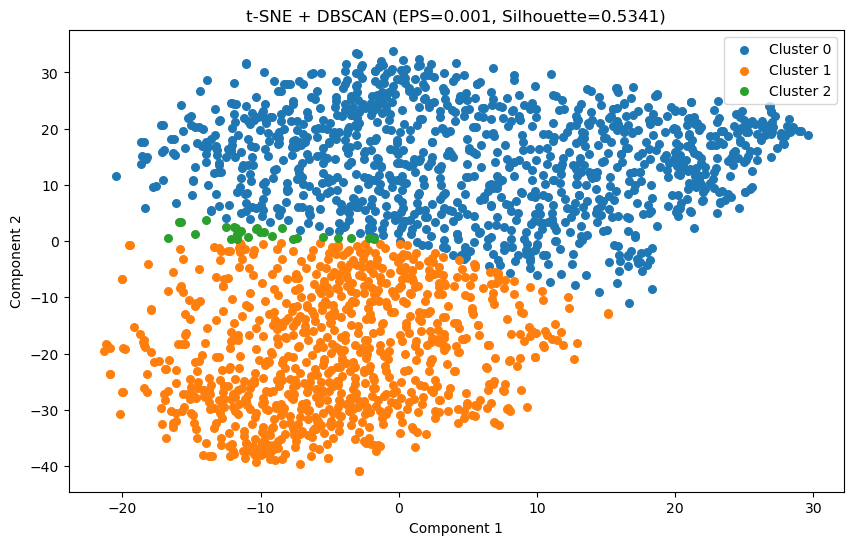

Performing DBSCAN with eps=0.0011, min_samples=5, metric=cosine...
Silhouette Score: 0.5341
DBSCAN found 3 clusters and 0 noise points.


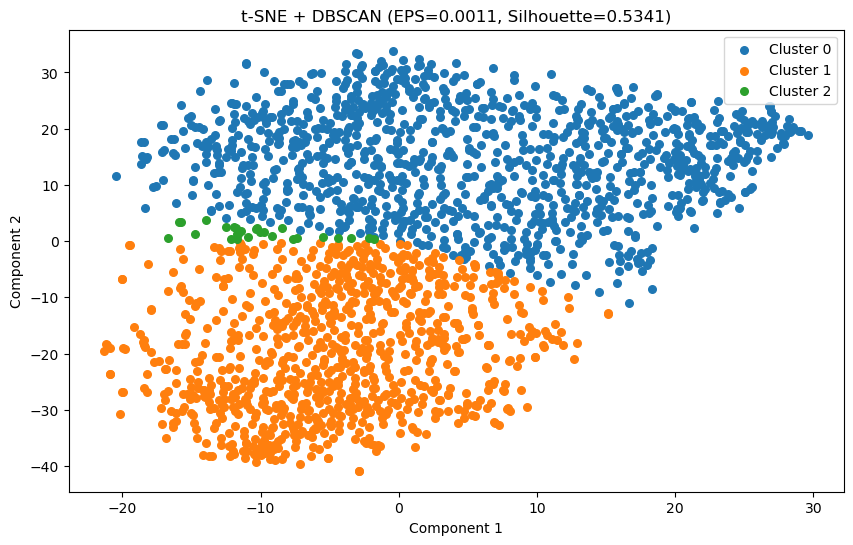

Performing DBSCAN with eps=0.0012, min_samples=5, metric=cosine...
Silhouette Score is not valid with only 1 cluster.
DBSCAN found 1 clusters and 0 noise points.


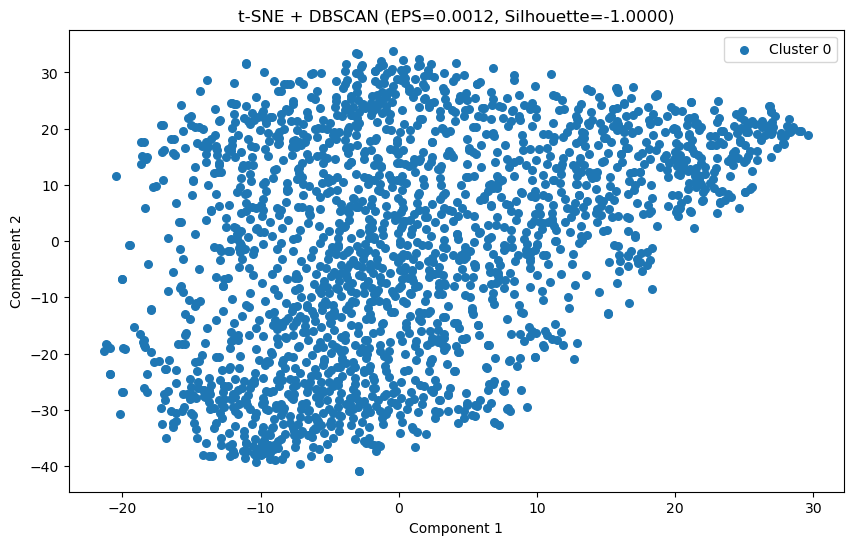

In [8]:
from sklearn.metrics import silhouette_score

# Function to calculate DBSCAN and silhouette score
def perform_dbscan_with_silhouette(data, eps, min_samples=5, metric='cosine'):
    print(f"Performing DBSCAN with eps={eps}, min_samples={min_samples}, metric={metric}...")
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = dbscan.fit_predict(data)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    # Calculate silhouette score if there are more than 1 cluster
    if n_clusters > 1:
        silhouette_avg = silhouette_score(data, labels, metric=metric)
        print(f"Silhouette Score: {silhouette_avg:.4f}")
    else:
        silhouette_avg = -1  # Invalid silhouette score
        print("Silhouette Score is not valid with only 1 cluster.")

    print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points.")
    return labels, silhouette_avg

# Main execution
if __name__ == "__main__":
    # Step 1: Perform t-SNE for dimensionality reduction
    tsne_data = perform_tsne(dataset, perplexity=30, learning_rate=200)

    # Step 2: Generate k-distance graph to find best epsilon
    k_distances = find_k_distance_graph(tsne_data, n_neighbors=5, metric='cosine')

    # Step 3: Set the best epsilon (manually chosen based on the elbow point)
    best_eps = 0.0008  # Adjust this based on the k-distance graph

    # Step 4: Apply DBSCAN with the chosen epsilon and calculate silhouette score
    labels, silhouette_avg = perform_dbscan_with_silhouette(tsne_data, eps=best_eps, min_samples=5, metric='cosine')

    # Step 5: Visualize the clustering result
    plot_2d(tsne_data, labels, f"t-SNE + DBSCAN Clustering (Best EPS={best_eps}, Silhouette={silhouette_avg:.4f})")

    # Step 6: Optional: Test multiple epsilon values
    for eps in [0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012]:
        labels, silhouette_avg = perform_dbscan_with_silhouette(tsne_data, eps=eps, min_samples=5, metric='cosine')
        plot_2d(tsne_data, labels, f"t-SNE + DBSCAN (EPS={eps}, Silhouette={silhouette_avg:.4f})")


Performing UMAP with n_neighbors=30, min_dist=0.05, n_components=2...


/home/cerendnr/miniforge3/envs/roboenv2/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP completed.


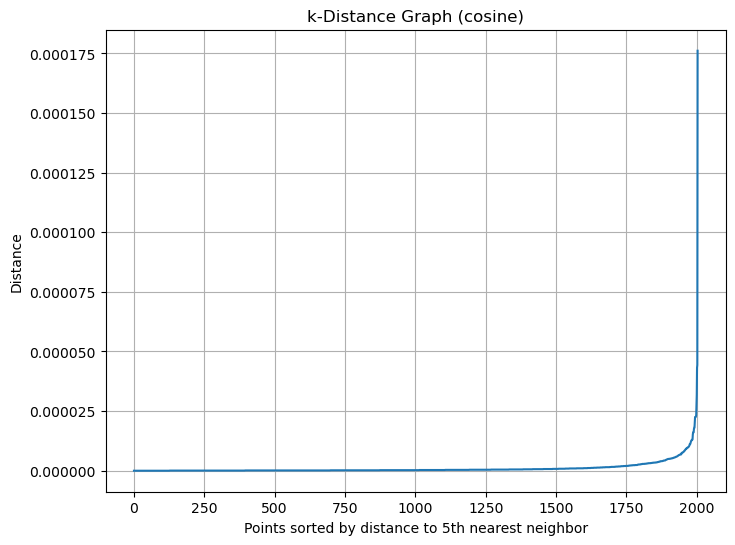

Performing DBSCAN with eps=1e-05, min_samples=5, metric=cosine...
Silhouette Score: 0.0369
DBSCAN found 14 clusters and 17 noise points.


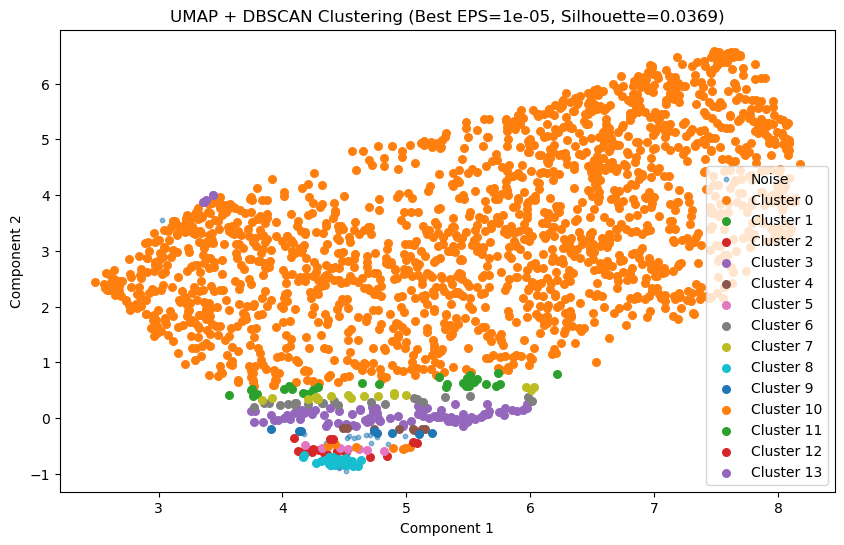

Performing DBSCAN with eps=1e-05, min_samples=5, metric=cosine...
Silhouette Score: 0.0369
DBSCAN found 14 clusters and 17 noise points.


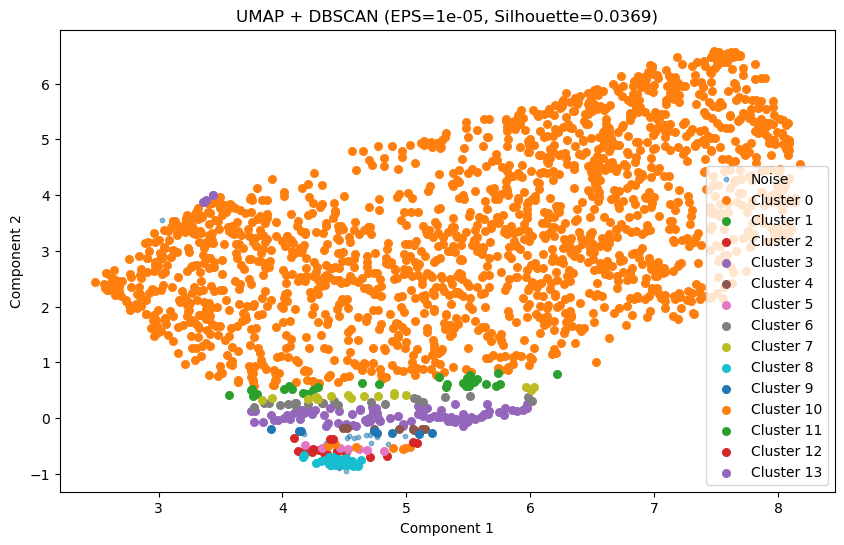

Performing DBSCAN with eps=1.5e-05, min_samples=5, metric=cosine...
Silhouette Score: 0.5166
DBSCAN found 8 clusters and 5 noise points.


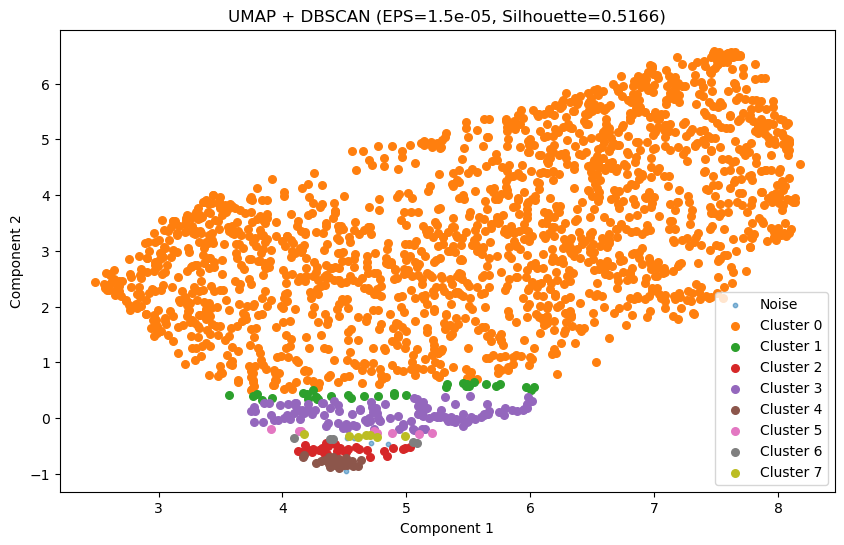

Performing DBSCAN with eps=2e-05, min_samples=5, metric=cosine...
Silhouette Score: 0.5879
DBSCAN found 7 clusters and 1 noise points.


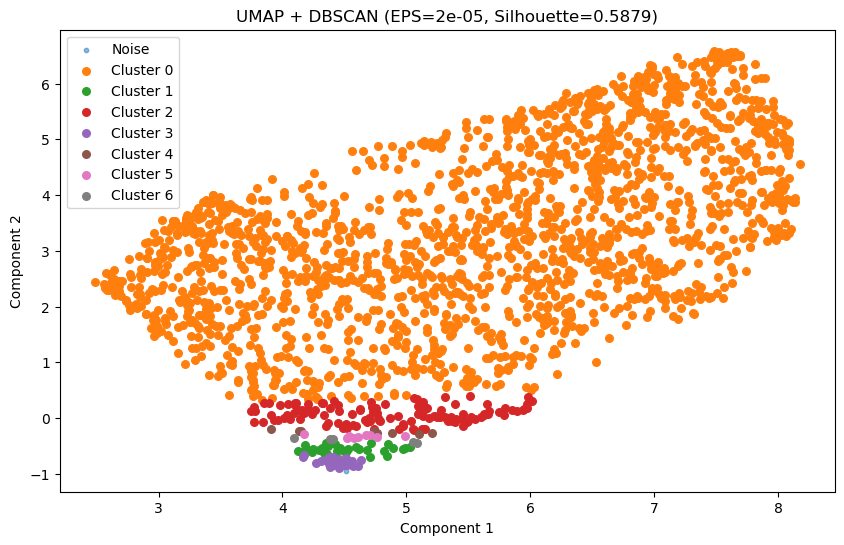

Performing DBSCAN with eps=2.5e-05, min_samples=5, metric=cosine...
Silhouette Score: 0.6329
DBSCAN found 3 clusters and 1 noise points.


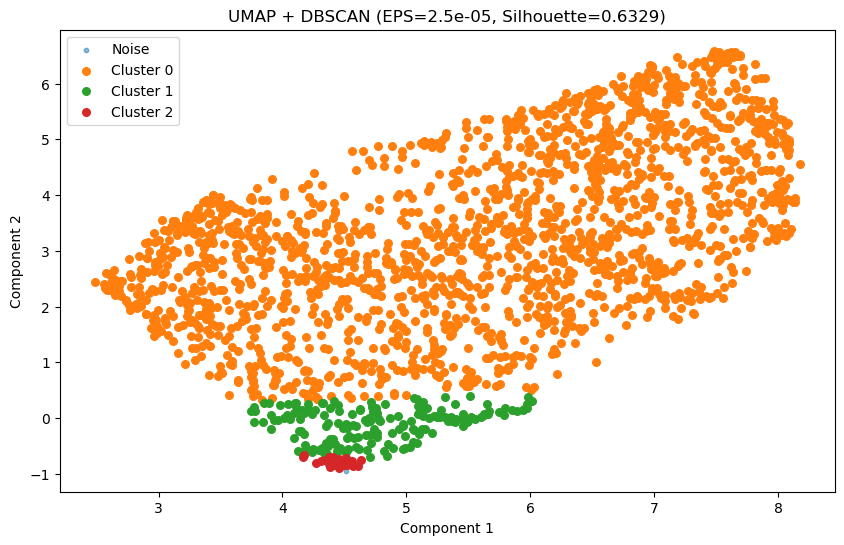

Performing DBSCAN with eps=3e-05, min_samples=5, metric=cosine...
Silhouette Score: 0.5995
DBSCAN found 2 clusters and 1 noise points.


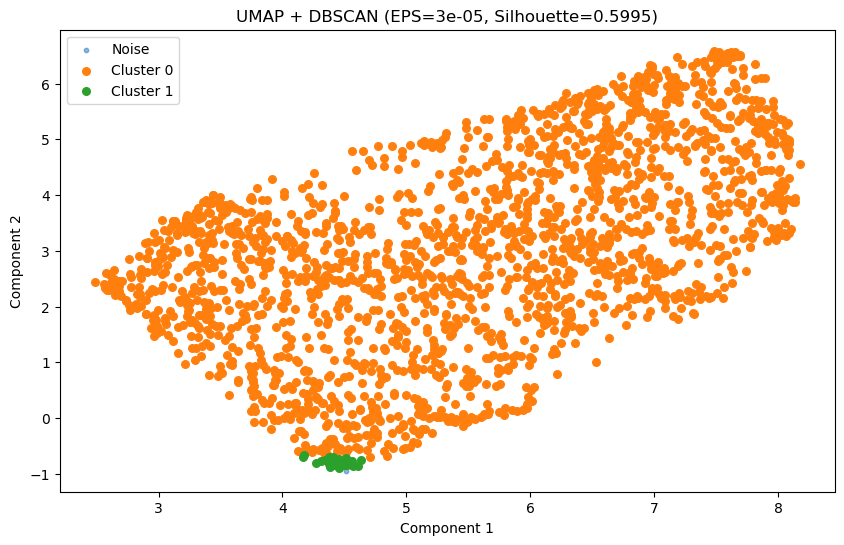

Performing DBSCAN with eps=4e-05, min_samples=5, metric=cosine...
Silhouette Score: 0.5995
DBSCAN found 2 clusters and 1 noise points.


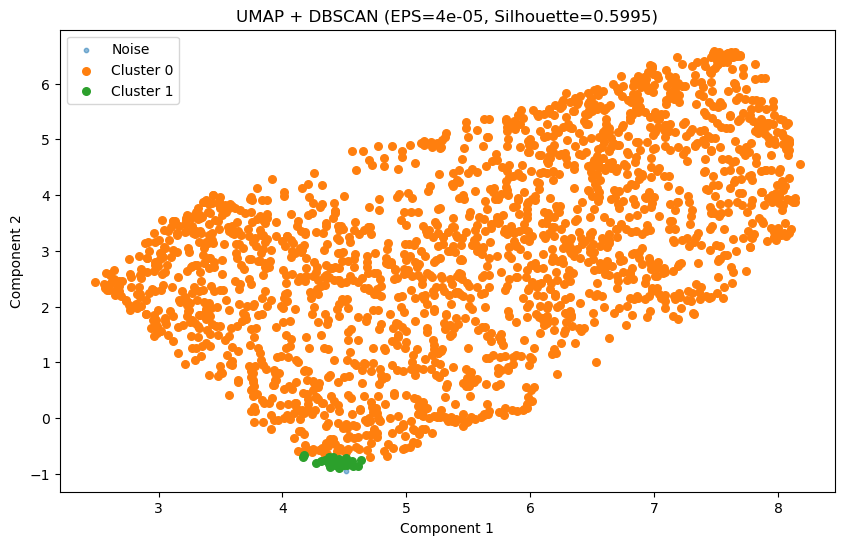

In [9]:
import umap.umap_ as umap
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Perform UMAP for dimensionality reduction
def perform_umap(data, n_neighbors=15, min_dist=0.1, n_components=2):
    print(f"Performing UMAP with n_neighbors={n_neighbors}, min_dist={min_dist}, n_components={n_components}...")
    umap_reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components, random_state=42)
    reduced_data = umap_reducer.fit_transform(data)
    print("UMAP completed.")
    return reduced_data

# Perform DBSCAN and calculate silhouette score
def perform_dbscan_with_silhouette(data, eps, min_samples=5, metric='cosine'):
    print(f"Performing DBSCAN with eps={eps}, min_samples={min_samples}, metric={metric}...")
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    labels = dbscan.fit_predict(data)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    # Calculate silhouette score if there are more than 1 cluster
    if n_clusters > 1:
        silhouette_avg = silhouette_score(data, labels, metric=metric)
        print(f"Silhouette Score: {silhouette_avg:.4f}")
    else:
        silhouette_avg = -1  # Invalid silhouette score
        print("Silhouette Score is not valid with only 1 cluster.")

    print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points.")
    return labels, silhouette_avg

# Generate k-distance graph for UMAP data
def find_k_distance_graph(data, n_neighbors=5, metric='cosine'):
    """
    Generate and plot the k-distance graph to find the optimal epsilon for DBSCAN.
    """
    from sklearn.neighbors import NearestNeighbors
    neighbors = NearestNeighbors(n_neighbors=n_neighbors, metric=metric)
    neighbors.fit(data)
    distances, _ = neighbors.kneighbors(data)

    # Sort the k-th nearest neighbor distances
    distances = np.sort(distances[:, n_neighbors - 1])

    # Plot the k-distance graph
    plt.figure(figsize=(8, 6))
    plt.plot(distances)
    plt.title(f"k-Distance Graph ({metric})")
    plt.xlabel(f"Points sorted by distance to {n_neighbors}th nearest neighbor")
    plt.ylabel("Distance")
    plt.grid()
    plt.show()

    return distances

# Function to visualize UMAP-reduced data
def plot_2d(data, labels, title):
    plt.figure(figsize=(10, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        if label == -1:  # For DBSCAN noise points
            plt.scatter(data[labels == label, 0], data[labels == label, 1], s=10, label="Noise", alpha=0.5)
        else:
            plt.scatter(data[labels == label, 0], data[labels == label, 1], s=30, label=f"Cluster {label}")
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Step 1: Perform UMAP for dimensionality reduction
    umap_data = perform_umap(dataset, n_neighbors=30, min_dist=0.05, n_components=2)

    # Step 2: Generate k-distance graph to find the best epsilon
    k_distances = find_k_distance_graph(umap_data, n_neighbors=5, metric='cosine')

    # Step 3: Set the best epsilon (manually chosen based on the elbow point)
    best_eps = 0.00001  # Adjust this based on the k-distance graph

    # Step 4: Apply DBSCAN with the chosen epsilon and calculate silhouette score
    labels, silhouette_avg = perform_dbscan_with_silhouette(umap_data, eps=best_eps, min_samples=5, metric='cosine')

    # Step 5: Visualize the clustering result
    plot_2d(umap_data, labels, f"UMAP + DBSCAN Clustering (Best EPS={best_eps}, Silhouette={silhouette_avg:.4f})")

    # Step 6: Optional: Test multiple epsilon values
    for eps in [0.00001, 0.000015,0.00002, 0.000025, 0.00003, 0.00004]:
        labels, silhouette_avg = perform_dbscan_with_silhouette(umap_data, eps=eps, min_samples=5, metric='cosine')
        plot_2d(umap_data, labels, f"UMAP + DBSCAN (EPS={eps}, Silhouette={silhouette_avg:.4f})")
